# Interaction Effects

Im folgenden werden wir einen Datensatz verwenden, um Interaktionseffekte zu untersuchen. Der Datensatz stammt aus @WARD1990AIDSKnowledgeFear.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols

# Load the data
df = pd.read_csv("https://raw.githubusercontent.com/febse/data/main/econ/drinking.csv")
df.head()

,male,drink,gpa,malegpa
0,1,5,3.20,3.20
1,0,9,3.00,0.00
2,1,29,2.85,2.85
3,0,22,NaN,NaN
4,0,19,NaN,NaN


/home/amarov/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



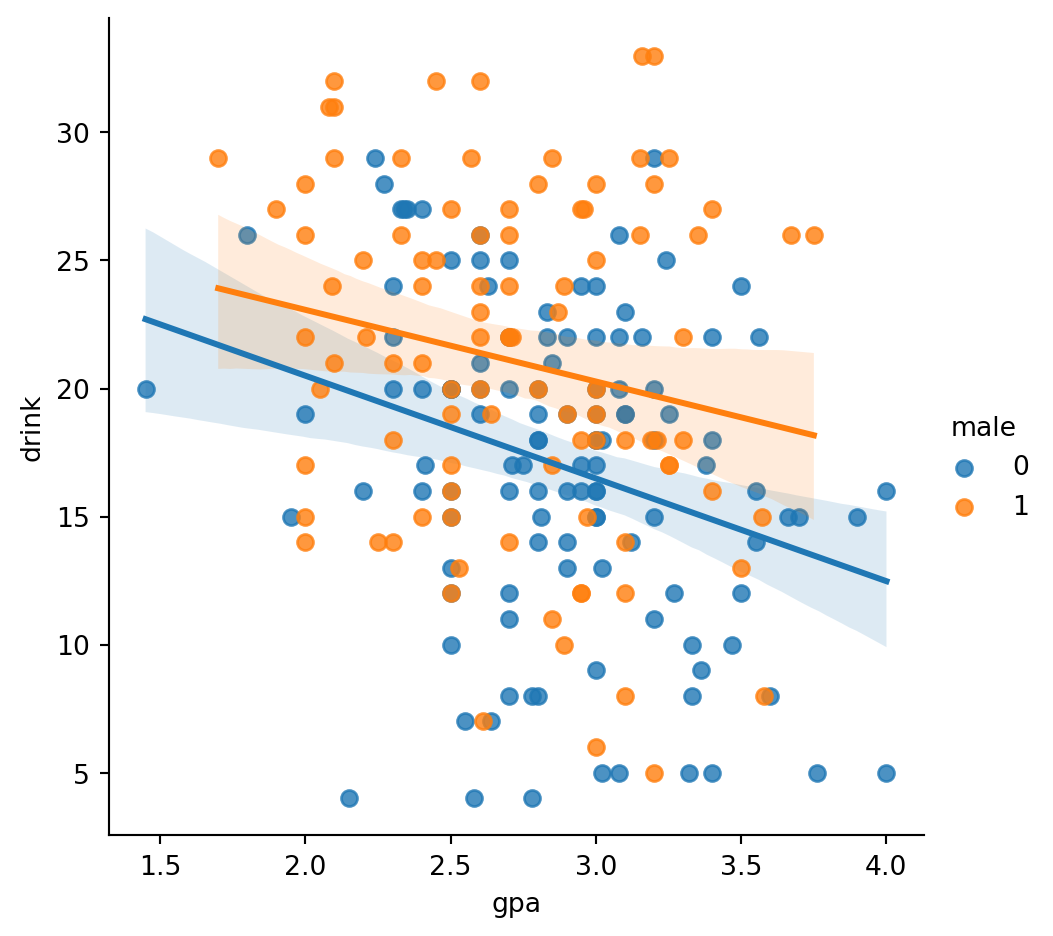

In [2]:
sns.lmplot(x='gpa', y='drink', data=df, hue="male")


## Modell 1

Schätzen Sie das folgende Modell:

$$
\text{drink} = \beta_0 + \beta_1 \text{gpa} + \epsilon
$$

Erläutern Sie, was $\hat{\beta}_0$ und $\hat{\beta}_1$ in diesem Modell schätzen.

In [3]:
# m1 = ols("", data=df).fit()

## Modell 2

Schätzen Sie das folgende Modell:

$$
\text{drink} = \beta_0 + \beta_1 \text{gpa} + \beta_2 \text{male} + \epsilon
$$

Erläutern Sie, was $\hat{\beta}_0$, $\hat{\beta}_1$ und $\hat{\beta}_2$ in diesem Modell schätzen.


In [4]:
# m2 = ols("", data=df).fit()

## Modell 3

Schätzen Sie das folgende Modell:

$$
\text{drink} = \beta_0 + \beta_1 \text{gpa} + \beta_2 \text{male} + \beta_3 \text{gpa} \times \text{male} + \epsilon
$$

Erläutern Sie, was $\hat{\beta}_0$, $\hat{\beta}_1$, $\hat{\beta}_2$ und $\hat{\beta}_3$ in diesem Modell schätzen.

In [5]:
m3 = ols("drink ~ gpa*male", data=df).fit()
m3.params

Intercept    28.522064
gpa          -4.011209
male          0.148815
gpa:male      1.212068
dtype: float64

In [6]:
m3p = m3.get_prediction().summary_frame()
m3p_with_ci = pd.concat([df, m3p], axis=1)
m3p_with_ci.head()

,male,drink,gpa,malegpa,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1,5,3.20,3.20,19.713625,0.917598,17.904938,21.522312,7.232428,32.194822
1,0,9,3.00,0.00,16.488436,0.593608,15.318369,17.658503,4.083680,28.893192
2,1,29,2.85,2.85,20.693325,0.655452,19.401357,21.985293,8.276478,33.110172
3,0,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/home/amarov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/amarov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='gpa', ylabel='drink'>

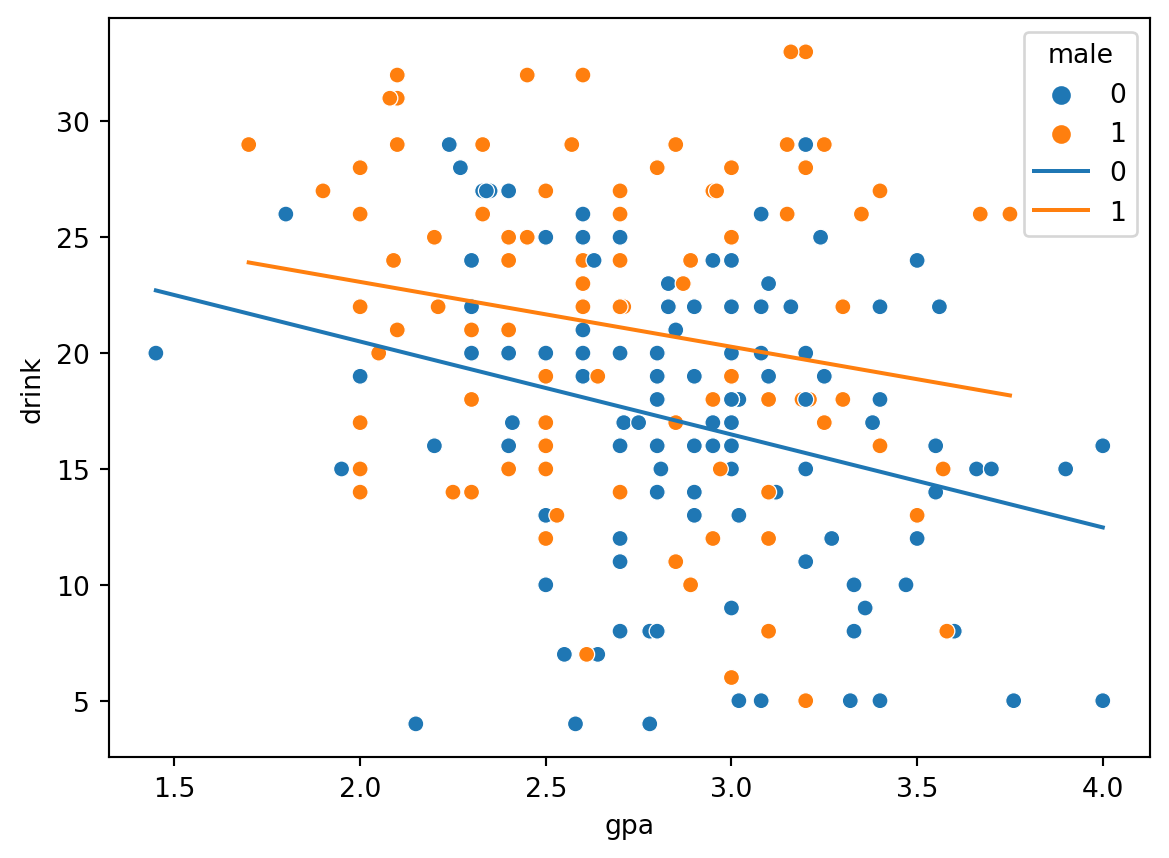

In [7]:
sns.scatterplot(x='gpa', y='drink', data=m3p_with_ci, hue="male")
sns.lineplot(x='gpa', y='mean', data=m3p_with_ci, hue="male")